In [16]:
import random
from PIL import Image, ImageDraw 

image = Image.open("bear.jpg") 
draw = ImageDraw.Draw(image) 
width  = image.size[0] 
height = image.size[1] 
pix = image.load() 
def sign(x): 
        if x > 0:
                return 1
        if x < 0:
                return -1
        return 0
    
def lineP(p1, p2, color):  
        x1 = p1[0]  
        y1 = p1[1]
        x2 = p2[0]
        y2 = p2[1]
        dX = abs(x2 - x1) 
        dY = abs(y2 - y1) 
        if dX >= dY: # если наклон по X больше Y, то X меняем на 1 и смотрим Y
            if x1 > x2: # если точка 2 правее точки 1, меняем их местами
                    x1, x2 = x2, x1
                    y1, y2 = y2, y1
            err = 0 # накапливаемая "ошибка"
            dErr = dY # "Изменение ошибки"
            y = y1    # текущий Y (начальное значение)
            dirY = sign(y2 - y1) # направление изменения Y
            for x in range(x1, x2 + 1): # перебираем все X от x1 до x2
                    draw.point((x,y),color) # закрашиваем пиксель (x,y)
                    err += dErr             # добавляем "смежение" к "ошибке"
                    if err + err >= dX: # если "ошибка" накопилась
                            y += dirY   # изменяем Y на 1
                            err -= dX   # вычитаем из "ошибки" dX
        else: # если наклон по Y больше, то, наоборот, Y меняем на 1 и смотрим X
            if y1 > y2: # если точка 2 ближе точки 1, меняем их местами
                    x1, x2 = x2, x1
                    y1, y2 = y2, y1
            err = 0 # накапливаемая "ошибка"
            dErr = dX
            x = x1
            dirX = sign(x2 - x1)
            for y in range(y1, y2 + 1):
                    draw.point((x,y),color)
                    err += dErr
                    if err + err >= dY:
                            x += dirX
                            err -= dY
                            
                            
def triangle (p1, p2, p3, color):
    
    [[x1,y1],[x2,y2],[x3,y3]]= sorted([p1, p2, p3])
    
    for i in range(x1, x2+1):
        k1 = round(((y2 - y1)/(x2 - x1))*(i - x1)+ y1) 
        k2 = round(((y1 - y3)/(x1 - x3))*(i - x3)+ y3) 
        lineP([i,k1],[i,k2], color)
        
    for i in range(x2, x3+1):
        k2 = round(((y1 - y3)/(x1 - x3))*(i - x3)+ y3)
        k3 = round(((y2 - y3)/(x2 - x3))*(i - x3)+ y3)
        lineP([i,k2],[i,k3], color)
        

# В следующих строках задаются цвета треугольников и точки, по которым они строятся
black = (0,0,0)
green = (0,200,0)
red = (200,0,0)
blue = (0,0,200)
t1 = (0,height//4)
t2 = (width//2, 0)
t3 = (width//4, height//2)
t4 = (width-1,height//2)
t5 = (width//2,height//4)
t6 = (width*3//4,0)
t7 = (0,height//2)
t8 = (width//4,height-1)
t9 = (width//2,height*3//4)
t10 = (width-1,height*3//4)
t11 = (width*3//4,height//2)
t12 = (width//2,height-1)

triangle(t1, t2, t3, green)
triangle(t4, t5, t6, red)
triangle(t7, t8, t9, blue)
triangle(t10, t11, t12, black)

image.show()
del draw

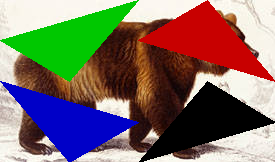